<a href="https://colab.research.google.com/github/reyhanMaulana-dev/Data-Mining/blob/main/Studycase2/Case_Study_2__Kelompok_G.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Case Study 02: Clustering Analysis**
----
----
## **`Kelompok G`**

**Anggota Kelompok:**

In [ ]:
!pip install PrettyTable
from prettytable import PrettyTable

# Specify the Column Names while initializing the Table
myTable = PrettyTable(["NIM", "Nama", "Kelas"])

# Add rows
myTable.add_row(["11220940000002", "Deswita Nur Ardias Farsha", "DS2"])
myTable.add_row(["11220940000040", "Marwah Habibah Rangkuti", "DS2"])
myTable.add_row(["11220940000048", "Reyhan Maulana Aryaduta", "DS2"])
myTable.add_row(["11220940000053", "Uswatun Hasanah", "DS1"])
myTable.add_row(["11220940000074", "Rachmat Nadhif Priatno", "DS1"]);

print(myTable)

+----------------+---------------------------+-------+
|      NIM       |            Nama           | Kelas |
+----------------+---------------------------+-------+
| 11220940000002 | Deswita Nur Ardias Farsha |  DS2  |
| 11220940000040 |  Marwah Habibah Rangkuti  |  DS2  |
| 11220940000048 |  Reyhan Maulana Aryaduta  |  DS2  |
| 11220940000053 |      Uswatun Hasanah      |  DS1  |
| 11220940000074 |   Rachmat Nadhif Priatno  |  DS1  |
+----------------+---------------------------+-------+


# **Rumusan Masalah**
1. Bagaimana keterkaitan antara pendapatan bulanan dan skor pengeluaran? Apakah pelanggan dengan pendapatan lebih tinggi menunjukkan perilaku belanja yang lebih bijaksana atau lebih konsumtif di MixITup?

2. Bagaimana hubungan antara usia pelanggan dan preferensi hari belanja favorit? Apakah ada kecenderungan generasi tertentu yang lebih tertarik berbelanja di akhir pekan dibanding hari biasa?

3. Sejauh mana efektivitas promo MixITup dalam mempengaruhi perilaku pembelian, terutama pada pelanggan dengan skor pengeluaran yang rendah? Apakah promo lebih berdampak pada segmen pelanggan tertentu?

4. Apakah status pernikahan memoderasi pengaruh pendapatan terhadap skor pengeluaran pelanggan di MixITup? Misalnya, apakah pelanggan yang sudah menikah dengan pendapatan tinggi lebih konservatif dalam pengeluaran dibanding yang belum menikah?

5. Apakah pelanggan dari kota besar seperti Jakarta cenderung menggunakan lebih banyak promo dibanding kota kecil, dan apakah ini berkaitan dengan kebijakan pemasaran lokal MixITup?

# **Tujuan**
Merekomendasikan kota yang ideal untuk membuka cabang baru serta strategi promosi yang tepat berdasarkan analisis data yang telah diperoleh

# **Import Library**


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [ ]:
import warnings; warnings.simplefilter('ignore')

In [ ]:
!pip install kmodes

In [ ]:
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

In [ ]:
import pickle

# **Import Data**

In [ ]:
try :
  df = pd.read_csv('data/Case-Study-02-MixITup.csv', index_col = "ID")
except :
  !mkdir data
  !wget -P data/ https://raw.githubusercontent.com/reyhanMaulana-dev/Data-Mining/refs/heads/main/Studycase2/Case-Study-02-MixITup.csv
  df = pd.read_csv('data/Case-Study-02-MixITup.csv', index_col = "ID")

--2024-10-18 13:43:38--  https://raw.githubusercontent.com/reyhanMaulana-dev/Data-Mining/refs/heads/main/Studycase2/Case-Study-02-MixITup.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10239 (10.0K) [text/plain]
Saving to: ‘data/Case-Study-02-MixITup.csv’

Case-Study-02-MixIT 100%[===================>]  10.00K  --.-KB/s    in 0s      

2024-10-18 13:43:39 (70.3 MB/s) - ‘data/Case-Study-02-MixITup.csv’ saved [10239/10239]



In [ ]:
df

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
ID,,,,,,,,,
101,Wanita,49,"Rp13,114,754",52,1,Jakarta,1.0,Sabtu,2
102,Wanita,32,"Rp33,606,557",86,1,Depok,1.0,Minggu,6
103,Pria,51,"Rp15,983,606",41,1,Jakarta,2.0,Minggu,3
104,Pria,19,"Rp12,704,918",55,0,Jakarta,1.0,Rabu,7
105,Wanita,38,"Rp20,081,967",42,1,Jakarta,2.0,Senin,8
...,...,...,...,...,...,...,...,...,...
296,Pria,31,"Rp4,098,360",73,1,Depok,1.0,Senin,0
297,Pria,57,"Rp15,983,606",51,1,Jakarta,1.0,Minggu,5
298,Wanita,35,"Rp43,032,786",79,1,Depok,1.0,Senin,7


# **Pendahuluan**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 101 to 300
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Jenis Kelamin         196 non-null    object 
 1   Umur                  200 non-null    object 
 2   Pendapatan-per-bulan  200 non-null    object 
 3   skor-pengeluaran      200 non-null    int64  
 4   Menikah               188 non-null    object 
 5   Kota                  200 non-null    object 
 6   Promo                 194 non-null    float64
 7   HariFav               200 non-null    object 
 8   FavFlavor             200 non-null    int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 15.6+ KB


In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Jenis Kelamin,196,3,Wanita,109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Umur,200,45,32,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pendapatan-per-bulan,200,64,"Rp25,819,672",12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
skor-pengeluaran,200.0,NaN,NaN,NaN,50.47,26.07101,1.0,34.75,50.0,73.0,101.0
Menikah,188,4,1,160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kota,200,4,Jakarta,87,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Promo,194.0,NaN,NaN,NaN,1.685567,0.970603,0.0,1.0,1.0,3.0,5.0
HariFav,200,7,Senin,66,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FavFlavor,200.0,NaN,NaN,NaN,3.605,2.743466,0.0,1.0,3.5,6.0,9.0


In [ ]:
df.isnull().sum()

,0
Jenis Kelamin,4
Umur,0
Pendapatan-per-bulan,0
skor-pengeluaran,0
Menikah,12
Kota,0
Promo,6
HariFav,0
FavFlavor,0


In [ ]:
rows_with_missing = df[df.isnull().any(axis=1)]
print("Baris dengan missing values:")
rows_with_missing

Baris dengan missing values:


,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
ID,,,,,,,,,
111,Wanita,31,"Rp11,475,409",54,1,Jakarta,NaN,Senin,6
116,Wanita,51,"Rp11,885,245",50,NaN,Jakarta,1.0,Minggu,2
120,NaN,49,"Rp9,836,065",28,1,Tangerang,3.0,Sabtu,7
134,Wanita,38,"Rp21,311,475",40,NaN,Jakarta,2.0,Selasa,7
143,Pria,39,"Rp25,819,672",88,NaN,Depok,1.0,Minggu,0
148,NaN,36,"Rp29,508,196",10,1,Tangerang,3.0,Minggu,6
165,Wanita,31,"Rp10,245,901",42,1,Jakarta,NaN,Minggu,6
183,Wanita,31,"Rp27,049,180",93,NaN,Depok,0.0,Selasa,0
191,Wanita,36,"Rp29,508,196",27,NaN,Tangerang,3.0,Minggu,5


# **Preprocessing**

### **Mengubah Tipe Data**

In [ ]:
# Mengubah tipe data
df['Jenis Kelamin'] = df['Jenis Kelamin'].astype('category')
df['Menikah'] = df['Menikah'].astype('category')
df['Kota'] = df['Kota'].astype('category')
df['Promo'] = df['Promo'].astype('category')
df['HariFav'] = df['HariFav'].astype('category')
df['FavFlavor'] = df['FavFlavor'].astype('category')

# Mengubah 'Pendapatan-per-bulan' ke string terlebih dahulu
df['Pendapatan-per-bulan'] = df['Pendapatan-per-bulan'].astype(str)

# Lalu ubah string ke float64
df['Pendapatan-per-bulan'] = df['Pendapatan-per-bulan'].str.replace('Rp', '').str.replace('.', '').str.replace(',', '').astype('float64')

In [ ]:
# Memperbaiki typo pada kolom umur
df['Umur'] = df['Umur'].replace("35'", 35)

# Mengubah tipe data kolom umur menjadi integer
df['Umur'] = df['Umur'].astype('int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 101 to 300
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Jenis Kelamin         196 non-null    category
 1   Umur                  200 non-null    int64   
 2   Pendapatan-per-bulan  200 non-null    float64 
 3   skor-pengeluaran      200 non-null    int64   
 4   Menikah               188 non-null    category
 5   Kota                  200 non-null    category
 6   Promo                 194 non-null    category
 7   HariFav               200 non-null    category
 8   FavFlavor             200 non-null    category
dtypes: category(6), float64(1), int64(2)
memory usage: 8.9 KB


### **Mengecek Distribusi Nilai Kolom Tipe Kategorik**

In [ ]:
# Untuk memeriksa distribusi nilai dalam kolom-kolom bertipe kategorik
for col in df.select_dtypes(include='category').columns:
    print(f"Kolom: {col}")
    print(df[col].value_counts())
    print("\n")

Kolom: Jenis Kelamin
Jenis Kelamin
Wanita    109
Pria       86
-           1
Name: count, dtype: int64


Kolom: Menikah
Menikah
1    160
0     26
       1
-      1
Name: count, dtype: int64


Kolom: Kota
Kota
Jakarta      87
Depok        59
Tangerang    53
JJakarta      1
Name: count, dtype: int64


Kolom: Promo
Promo
1.0    86
3.0    50
2.0    43
0.0    14
5.0     1
Name: count, dtype: int64


Kolom: HariFav
HariFav
Senin     66
Sabtu     54
Minggu    43
Selasa    21
Kamis      6
Jumat      5
Rabu       5
Name: count, dtype: int64


Kolom: FavFlavor
FavFlavor
0    40
1    20
2    20
3    20
4    20
5    20
6    20
7    20
8    19
9     1
Name: count, dtype: int64




### **Mengecek dan Menangani Noise**

In [ ]:
# Menangani Noise
df['Kota'] = df['Kota'].replace('JJakarta', 'Jakarta') # memperbaiki kesalahan penulisan
df = df[(df['FavFlavor'] != 9)]# Hapus baris di mana FavFlavour bernilai 9
df = df[(df['Promo'] != 5)] # Hapus baris di mana Promo bernilai 5
df = df[(df['skor-pengeluaran'] != 101)] # Hapus baris di mana skor-pengeluaran bernilai 101
df = df[(df['Pendapatan-per-bulan'] != 0) & (df['Pendapatan-per-bulan'].notna())] # Menghapus baris yang pendapatan perbulan bernilai 0

In [ ]:
df['Promo'] = df['Promo'].cat.remove_categories([5])
df['FavFlavor'] = df['FavFlavor'].cat.remove_categories([9])

### **Mengecek dan Menangani Outlier**

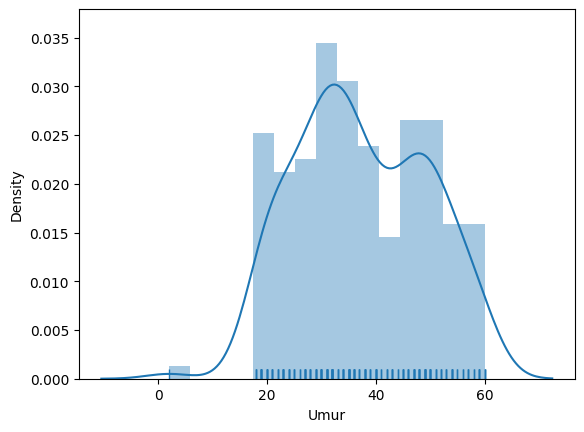

In [ ]:
# Cek Outlier pada Umur
import seaborn as sns
p = sns.distplot(df['Umur'], kde=True, rug=True, bins=15)

In [ ]:
# Menghitung Z-score untuk kolom 'Umur'
z_score_umur = abs(df.Umur - df.Umur.mean()) / df.Umur.std() <= 2

# Filter data berdasarkan Z-score
df = df[z_score_umur]

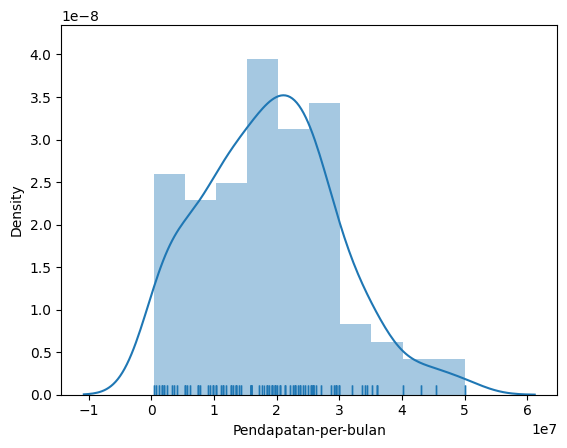

In [ ]:
# Cek Outlier pada Pendapatan-per-bulan
import seaborn as sns
p = sns.distplot(df['Pendapatan-per-bulan'], kde=True, rug=True)

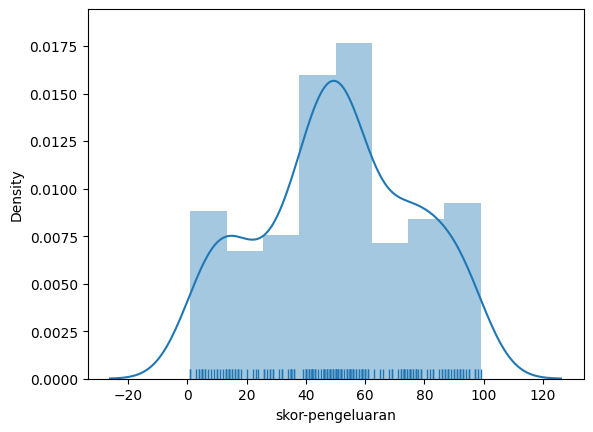

In [ ]:
# Cek Outlier pada skor-pengeluaran
import seaborn as sns
p = sns.distplot(df['skor-pengeluaran'], kde=True, rug=True)

### **Mengecek dan Menangani Missing Value**

In [ ]:
df.isnull().sum()

,0
Jenis Kelamin,4
Umur,0
Pendapatan-per-bulan,0
skor-pengeluaran,0
Menikah,11
Kota,0
Promo,6
HariFav,0
FavFlavor,0


In [ ]:
# Menampilkan baris yang memiliki nilai null
df_with_mv = df[df.isnull().any(axis=1)]
df_with_mv

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
ID,,,,,,,,,
111,Wanita,31,11475409.0,54,1,Jakarta,NaN,Senin,6
116,Wanita,51,11885245.0,50,NaN,Jakarta,1.0,Minggu,2
120,NaN,49,9836065.0,28,1,Tangerang,3.0,Sabtu,7
134,Wanita,38,21311475.0,40,NaN,Jakarta,2.0,Selasa,7
143,Pria,39,25819672.0,88,NaN,Depok,1.0,Minggu,0
148,NaN,36,29508196.0,10,1,Tangerang,3.0,Minggu,6
165,Wanita,31,10245901.0,42,1,Jakarta,NaN,Minggu,6
183,Wanita,31,27049180.0,93,NaN,Depok,0.0,Selasa,0
191,Wanita,36,29508196.0,27,NaN,Tangerang,3.0,Minggu,5


In [ ]:
# Mengisi kolom "Jenis Kelamin" yang kosong dengan "wanita"
df['Jenis Kelamin'] = df['Jenis Kelamin'].fillna('Wanita')
df['Jenis Kelamin'] = df['Jenis Kelamin'].replace('-', 'Wanita')

# Mengisi kolom "Menikah" yang kosong dengan 1, karena rata-rata usia pernikahan di Indonesia saat umur 22
df['Menikah'] = df['Menikah'].fillna("1")
df['Menikah'] = df['Menikah'].replace(' ', '1')
df['Menikah'] = df['Menikah'].replace('-', '1')

# Mengisi kolom "Promo" yang kosong dengan 0
df['Promo'] = df['Promo'].fillna(0)

In [ ]:
df.isnull().sum()

,0
Jenis Kelamin,0
Umur,0
Pendapatan-per-bulan,0
skor-pengeluaran,0
Menikah,0
Kota,0
Promo,0
HariFav,0
FavFlavor,0


In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Jenis Kelamin,194,2,Wanita,110,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Umur,194.0,NaN,NaN,NaN,37.525773,11.650429,18.0,29.0,36.0,48.0,60.0
Pendapatan-per-bulan,194.0,NaN,NaN,NaN,18917947.824742,10681680.086848,409836.0,11168032.0,19262295.0,25819672.0,50000000.0
skor-pengeluaran,194.0,NaN,NaN,NaN,50.5,25.890012,1.0,35.0,50.0,73.0,99.0
Menikah,194,2,1,171,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kota,194,3,Jakarta,85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Promo,194.0,4.0,1.0,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HariFav,194,7,Senin,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FavFlavor,194.0,9.0,0.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(194, 9)

# **EDA**

### **EDA Tipe Data Numerik**

<Figure size 640x480 with 0 Axes>

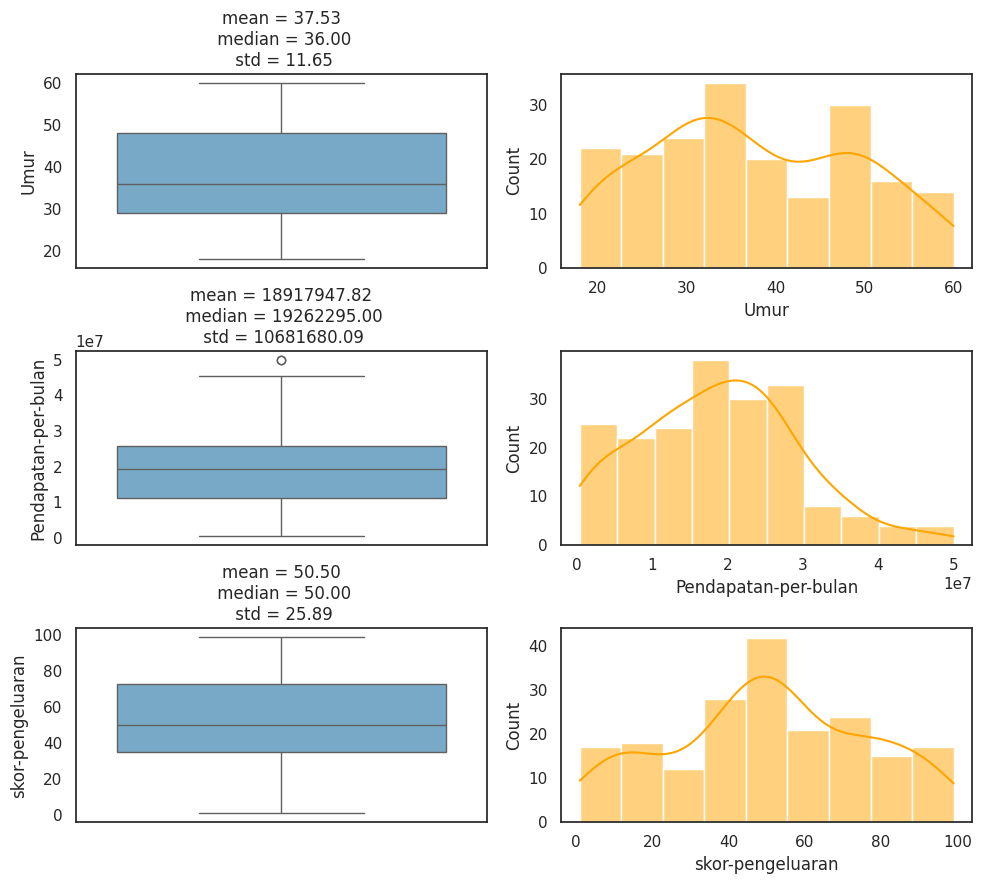

In [ ]:
kolom_numerik = ['Umur', 'Pendapatan-per-bulan', 'skor-pengeluaran']
# Mengatur style
sns.set(style='white')
plt.clf()

# Fungsi untuk membuat plot
def observasi_num(features):
    fig, axs = plt.subplots(3, 2, figsize=(10, 9))
    for i, kol in enumerate(features):
        if i < 3:  # Pastikan kita tidak melebihi jumlah subplot

            # Membuat boxplot
            sns.boxplot(data=df, y=kol, ax=axs[i][0], palette='Blues')
            # Membuat histogram
            sns.histplot(df[kol], kde=True, ax=axs[i][1], color='orange')  # Menggunakan histplot dengan kde
            axs[i][0].set_title('mean = %.2f\n median = %.2f\n std = %.2f' %
                                (df[kol].mean(), df[kol].median(), df[kol].std()))
    plt.tight_layout()
    plt.show()

# Memanggil fungsi untuk membuat Plot untuk data numerik
observasi_num(kolom_numerik)

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  anchor: (float, float) or {'C', 'SW', 'S', 'SE', 'E', 'NE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or float
  autoscale_on: bool
  autoscalex_on: unknown
  autoscaley_on: unknown
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: float or None
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  facecolor or fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  mouseover: bool
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  ras

<Figure size 640x480 with 0 Axes>

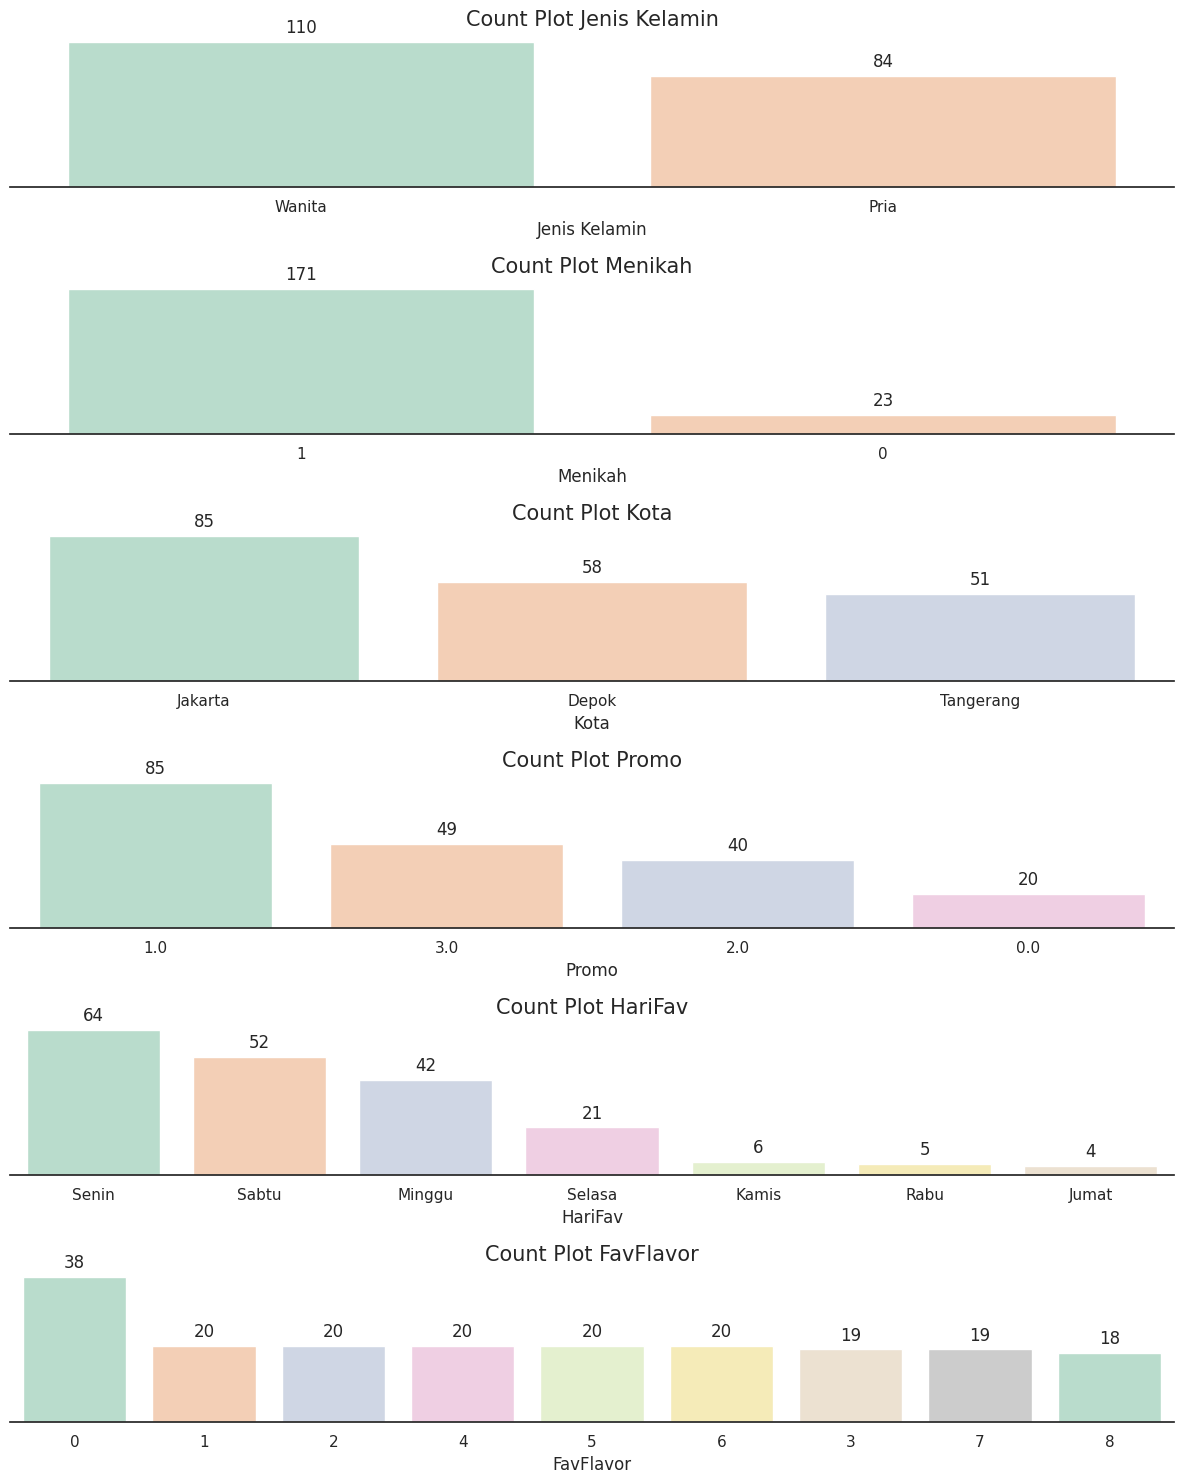

In [ ]:
# Define kolom_kategorik
kolom_kategorik = ['Jenis Kelamin', 'Menikah', 'Kota', 'Promo', 'HariFav', 'FavFlavor']
sns.set(style='white')
plt.clf()

# Membuat canvas
fig, axs = plt.subplots(6, 1, figsize=(12, 15))

# Membuat plot untuk setiap kolom kategorikal
for i, kol2 in enumerate(kolom_kategorik):
    # Check if the column exists in the DataFrame
    if kol2 in df.columns:
        # Membuat Plot dengan palette warna
        sns.countplot(x=df[kol2], order=df[kol2].value_counts().index, ax=axs[i], palette="Pastel2")
        axs[i].set_title(f'Count Plot {kol2}', fontsize=15)
        axs[i].set_xlabel(kol2)  # Memberikan label pada sumbu-x
        axs[i].set_ylabel('Jumlah')  # Memberikan label pada sumbu-y

        # Memberikan anotasi
        for p in axs[i].patches:
            axs[i].annotate(format(p.get_height(), '.0f'),
                            (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', xytext=(0, 10),
                            textcoords='offset points')

        # Setting Plot
        sns.despine(right=True, top=True, left=True)
        axs[i].axes.yaxis.set_visible(False)
        plt.setp(axs)
        plt.tight_layout()
    else:
        print(f"Column '{kol2}' not found in DataFrame. Skipping...")

# Tampilkan plot
plt.show()

### **Rumusan Masalah Nomor 1**
Bagaimana keterkaitan antara pendapatan bulanan dan skor pengeluaran? Apakah pelanggan dengan pendapatan lebih tinggi menunjukkan perilaku belanja yang lebih bijaksana atau lebih konsumtif di MixITup?

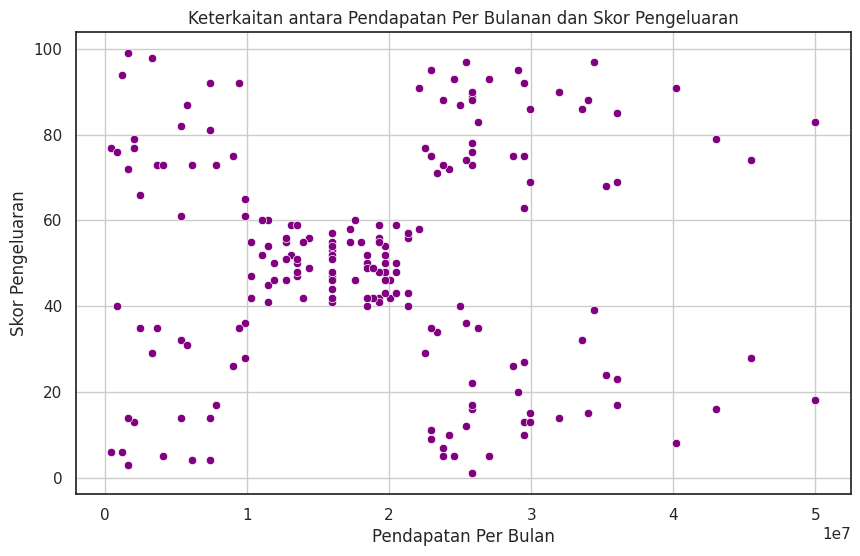

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Pendapatan-per-bulan', y='skor-pengeluaran', data=df, color='purple')
plt.title('Keterkaitan antara Pendapatan Per Bulanan dan Skor Pengeluaran')
plt.xlabel('Pendapatan Per Bulan')
plt.ylabel('Skor Pengeluaran')
plt.grid()
plt.show()

### **Interpretasi**

- Pelanggan dengan pendapatan tinggi (30-50 juta) ada yang memiliki skor pengeluaran rendah, sementara beberapa pelanggan dengan pendapatan tinggi lainnya justru memiliki skor pengeluaran yang tinggi.
- Pelanggan dengan pendapatan rendah (1-10 juta) juga menunjukkan variasi skor pengeluaran yang lebar, dari yang sangat rendah hingga yang sangat tinggi.
- Di sisi lain, pada kisaran pendapatan 10-20 juta, skor pengeluaran lebih stabil, tetapi masih tidak menunjukkan bahwa semakin tinggi pendapatan, semakin konsumtif atau bijaksana perilaku belanja.

Berdasarkan visualisasi scatter plot, tidak ada keterkaitan yang jelas antara pendapatan bulanan dan skor pengeluaran di MixITUp. Jadi, bisa disimpulkan bahwa pendapatan yang lebih tinggi tidak selalu membuat pelanggan lebih bijaksana atau lebih konsumtif.

### **Rumusan Masalah Nomor 2**
Bagaimana hubungan antara usia pelanggan dan preferensi hari belanja favorit? Apakah ada kecenderungan generasi tertentu yang lebih tertarik berbelanja di akhir pekan dibanding hari biasa?

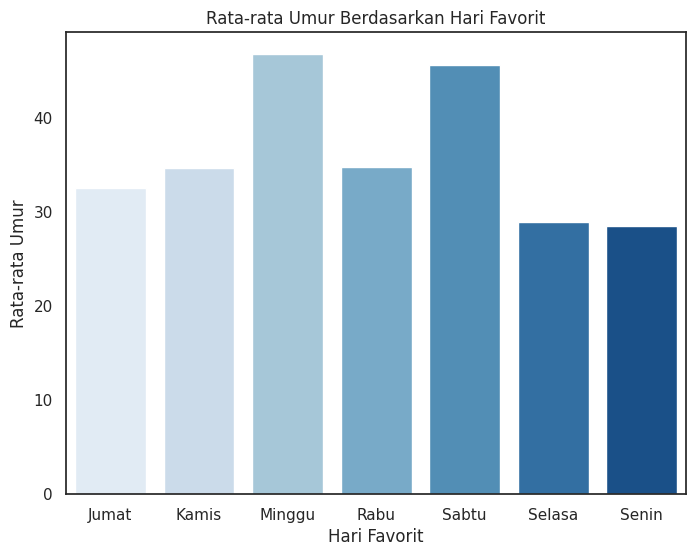

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x= 'HariFav', y = 'Umur', data = df, palette = 'Blues', ci = None)
plt.title('Rata-rata Umur Berdasarkan Hari Favorit')
plt.xlabel('Hari Favorit')
plt.ylabel('Rata-rata Umur')
plt.show()

### **Interpretasi**
- Hari Sabtu dan Minggu: Terlihat bahwa rata-rata usia tertinggi berada pada dua hari ini, dengan Sabtu dan Minggu memiliki rata-rata usia sekitar 40 tahun. Ini menunjukkan bahwa pelanggan yang lebih tua cenderung memilih akhir pekan untuk berbelanja.

- Hari Senin - Jum'at: Memiliki rata-rata usia yang lebih rendah, sekitar 30 tahun, menunjukkan bahwa pelanggan yang lebih muda lebih suka berbelanja pada hari-hari biasa.

Jadi dapat disimpulkan generasi yang lebih tua memang cenderung memilih untuk berbelanja di akhir pekan (Sabtu dan Minggu), sedangkan generasi yang lebih muda lebih memilih hari kerja seperti Senin - Jum'at.

### **Rumusan Masalah Nomor 3**
Sejauh mana efektivitas promo MixITup dalam mempengaruhi perilaku pembelian, terutama pada pelanggan dengan skor pengeluaran yang rendah? Apakah promo lebih berdampak pada segmen pelanggan tertentu?

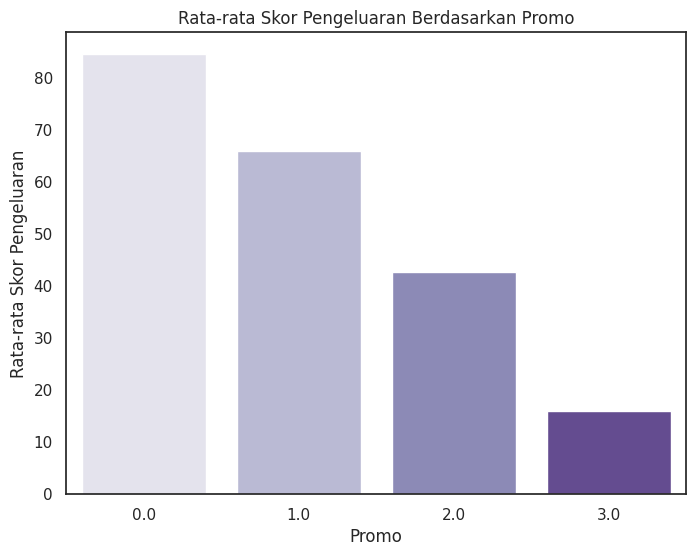

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x= 'Promo', y = 'skor-pengeluaran', data = df, palette = 'Purples', ci = None)
plt.title('Rata-rata Skor Pengeluaran Berdasarkan Promo')
plt.xlabel('Promo')
plt.ylabel('Rata-rata Skor Pengeluaran')
plt.show()

### **Interpretasi**

- Pelanggan dengan skor pengeluaran 15 Sering menggunakan promo artinya
Promo lebih efektif untuk pelanggan ini, karena mereka sering memanfaatkan promo untuk melakukan pembelian, meskipun total pengeluarannya rendah.

- Pelanggan dengan skor pengeluaran 45 cukup sering(sedang) menggunakan promo, Ini menunjukkan bahwa promo cukup efektif dalam meningkatkan pembelian mereka, namun tidak menyebabkan mereka melakukan pembelian lebih sering atau dalam jumlah yang sangat besar.

- Pelanggan dengan skor pengeluaran tinggi sekitar  65 jarang menggunakan promo, artinya
Promo kurang efektif pada pelanggan ini, karena meskipun jarang menggunakan promo, mereka tetap melakukan pembelian dalam jumlah besar.

- Pelanggan dengan skor pengeluaran tertinggi sekitar 80 Tidak pernah menggunakan promo, artinya Promo tidak efektif untuk segmen ini, karena mereka tidak memanfaatkan promo sama sekali namun tetap memiliki pengeluaran tinggi.

Dapat disimpulkan promo lebih berdampak pada pelanggan dengan skor pengeluaran rendah, sementara pelanggan dengan pengeluaran tinggi tidak terlalu terpengaruh oleh promo.

### **Rumusan Masalah Nomor 4**
Apakah status pernikahan memoderasi pengaruh pendapatan terhadap skor pengeluaran pelanggan di MixITup? Misalnya, apakah pelanggan yang sudah menikah dengan pendapatan tinggi lebih konservatif dalam pengeluaran dibanding yang belum menikah?

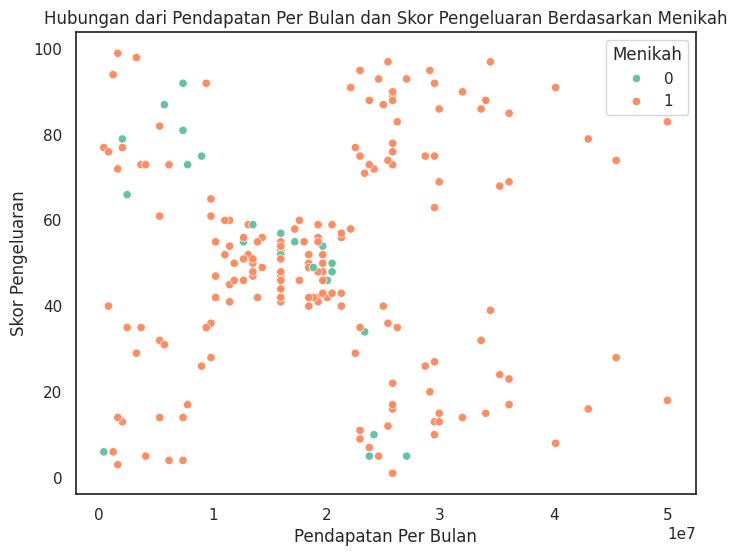

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Pendapatan-per-bulan', y='skor-pengeluaran', hue='Menikah', data=df, palette='Set2')

plt.title('Hubungan dari Pendapatan Per Bulan dan Skor Pengeluaran Berdasarkan Menikah')
plt.xlabel('Pendapatan Per Bulan')
plt.ylabel('Skor Pengeluaran')

plt.show()

### **Interpretasi**
- **Pelanggan yang sudah menikah (titik orange)** cenderung tersebar merata di semua rentang pendapatan, dengan skor pengeluaran yang lebih variatif. Tidak terlihat tren jelas bahwa mereka lebih konservatif dalam pengeluaran, bahkan beberapa dengan pendapatan tinggi masih memiliki skor pengeluaran yang tinggi.

- **Pelanggan yang belum menikah (titik hijau)** cenderung lebih terpusat di pendapatan yang lebih rendah. Namun, beberapa dari mereka juga memiliki skor pengeluaran yang tinggi, terutama pada kelompok pendapatan yang lebih rendah.

- **Tidak ada bukti jelas bahwa pelanggan yang sudah menikah dengan pendapatan tinggi lebih konservatif** dibandingkan yang belum menikah. Kedua kelompok terlihat memiliki pola pengeluaran yang cukup beragam, terutama di rentang pendapatan menengah ke atas.

Jadi  Secara keseluruhan, status pernikahan **tidak menunjukkan moderasi yang signifikan** terhadap pengaruh pendapatan pada skor pengeluaran di MixITup.

### **Rumusan Masalah Nomor 5**
Apakah pelanggan dari kota besar seperti Jakarta cenderung menggunakan lebih banyak promo dibanding kota kecil, dan apakah ini berkaitan dengan kebijakan pemasaran lokal MixITup?

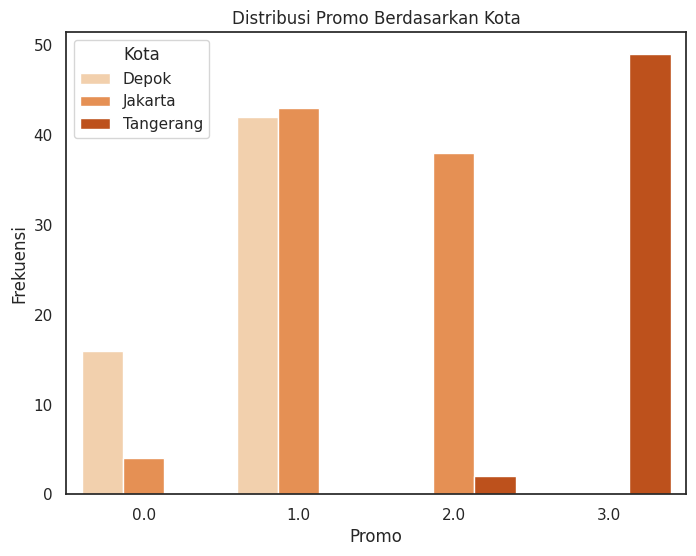

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Promo', hue='Kota', palette='Oranges')
plt.title('Distribusi Promo Berdasarkan Kota')
plt.xlabel('Promo')
plt.ylabel('Frekuensi')
plt.legend(title='Kota')
plt.show()

### **Interpretasi**

- Di Kota Depok terdapat sekitar 15 orang yang tidak pernah menggunakan promo dan 40 orang yang Jarang menggunakan promo
- Di Kota Jakarta terdapat sekitar 4 orang yang tidak pernah menggunakan promo dan lebih dari 40 orang jarang menggunakan promo serta sekitar 39 orang cukup sering menggunakan promo
- Di kota tangerang terdapat sekitar 2 orang yg cukup sering menggunakan promo dan sekitar 48 orang yang sangat sering menggunakan promo

Pelanggan dari kota besar seperti Jakarta cenderung menggunakan lebih banyak promo, tetapi pelanggan di Tangerang yang juga merupakan bagian dari wilayah metropolitan sering memanfaatkan promo. Hal ini menunjukkan bahwa meskipun pelanggan di kota besar memiliki kecenderungan untuk menggunakan promo, perilaku ini juga sangat dipengaruhi oleh faktor lokal seperti kesadaran merk dan nilai serta kebiasaan belanja.
Kebijakan pemasaran seperti MixITup yang menawarkan penawaran dan promo khusus dapat memperkuat penggunaan promo di Tangerang. Dengan demikian, perilaku penggunaan promo di kota-kota besar seperti Jakarta dan Tangerang dapat berkaitan dengan strategi pemasaran yang diterapkan di masing-masing area.

# **Customer Segmentation**

### **Standarisasi variabel**

In [ ]:
#Statistik sebelum Standarisasi
print('Statistik sebelum Standarisasi\n')
print(df[kolom_numerik ].describe().round(1))

# Standarisasi
df_std = StandardScaler().fit_transform(df[kolom_numerik])

# Membuat DataFrame
df_std = pd.DataFrame(data=df_std, index=df.index, columns=df[kolom_numerik].columns)

# Menampilkan contoh isi data dan summary statistik
print('\nHasil Standarisasi\n')
print(df_std.head())

print('\nStatistik Hasil Standarisasi\n')
print(df_std.describe().round(0))

Statistik sebelum Standarisasi

        Umur  Pendapatan-per-bulan  skor-pengeluaran
count  194.0                 194.0             194.0
mean    37.5            18917947.8              50.5
std     11.7            10681680.1              25.9
min     18.0              409836.0               1.0
25%     29.0            11168032.0              35.0
50%     36.0            19262295.0              50.0
75%     48.0            25819672.0              73.0
max     60.0            50000000.0              99.0

Hasil Standarisasi

         Umur  Pendapatan-per-bulan  skor-pengeluaran
ID                                                   
101  0.987424             -0.544690          0.058087
102 -0.475525              1.378680          1.374733
103  1.159536             -0.275419         -0.367886
104 -1.594251             -0.583158          0.174262
105  0.040810              0.109255         -0.329161

Statistik Hasil Standarisasi

        Umur  Pendapatan-per-bulan  skor-pengeluaran
count  1

In [ ]:
# Membuat salinan data frame
kolom_kategorik = [ 'Kota', 'Promo']
df_encode = df[kolom_kategorik].copy()

# Melakukan labelEncoder untuk semua kolom kategorik
for col in kolom_kategorik:
    df_encode[col] = LabelEncoder().fit_transform(df_encode[col])

# Menampilkan data
print(df_encode.head())

     Kota  Promo
ID              
101     1      1
102     0      1
103     1      2
104     1      1
105     1      2


In [ ]:
#Menggabungkan data frame
df_final = df_encode.merge(df_std, left_index = True, right_index=True, how = 'left')
print(df_final.head())

     Kota  Promo      Umur  Pendapatan-per-bulan  skor-pengeluaran
ID                                                                
101     1      1  0.987424             -0.544690          0.058087
102     0      1 -0.475525              1.378680          1.374733
103     1      2  1.159536             -0.275419         -0.367886
104     1      1 -1.594251             -0.583158          0.174262
105     1      2  0.040810              0.109255         -0.329161


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, 101 to 300
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Kota                  194 non-null    int64  
 1   Promo                 194 non-null    int64  
 2   Umur                  194 non-null    float64
 3   Pendapatan-per-bulan  194 non-null    float64
 4   skor-pengeluaran      194 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 9.1 KB


### **Clustering Menggunakan Algoritma K-Prototypes**

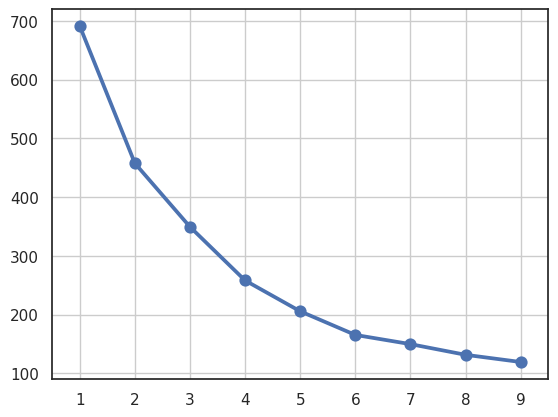

In [ ]:
# Melakukan Iterasi untuk mendapatkan nilai Cost
cost = {}
for k in range(1,10):
  kproto = KPrototypes(n_clusters = k, random_state = 75)
  kproto.fit_predict(df_final, categorical = [0,1])
  cost[k] = kproto.cost_

# Memvisualisasikan Elbow Plot
sns.pointplot(x = list(cost.keys()), y = list(cost.values()))
plt.grid()
plt.show()

In [ ]:
Kproto = KPrototypes(n_clusters = 4, random_state = 60)
kproto = Kproto.fit(df_final, categorical = [0,1])

#Save Model
pickle.dump(kproto, open('cluster.pkl', 'wb'))

In [ ]:
# Menentukan segmen tiap pelanggan
clusters = kproto.predict(df_final, categorical = [0,1])
print('Segmen Pelanggan: {}\n'.format(clusters))

# Menggabungkan data awal dan segmen pelanggan
df_final_cluster = df.copy()
df_final_cluster['cluster'] = clusters

Segmen Pelanggan: [1 2 1 0 1 2 0 0 0 0 0 2 3 1 1 3 2 1 1 0 0 1 3 2 0 1 0 0 2 0 2 2 1 0 3 0 2
 1 0 1 0 2 3 2 1 0 3 1 0 1 0 1 1 1 1 1 1 3 1 0 1 1 1 0 1 2 1 0 2 1 1 1 3 0
 3 1 2 2 0 2 1 2 3 1 1 1 3 1 2 3 3 1 3 3 2 1 1 1 0 1 3 3 1 1 1 0 0 0 0 0 2
 0 1 1 3 1 1 2 1 1 3 3 3 0 1 3 1 0 0 3 0 1 3 2 0 0 1 2 0 3 3 2 0 1 0 1 3 2
 3 0 2 0 1 2 2 1 2 0 2 1 2 1 2 2 0 2 0 3 1 0 2 3 3 0 0 2 3 2 3 0 3 1 1 1 3
 0 2 1 0 0 1 2 0 1]



In [ ]:
df_final_cluster

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor,cluster
ID,,,,,,,,,,
101,Wanita,49,13114754.0,52,1,Jakarta,1.0,Sabtu,2,1
102,Wanita,32,33606557.0,86,1,Depok,1.0,Minggu,6,2
103,Pria,51,15983606.0,41,1,Jakarta,2.0,Minggu,3,1
104,Pria,19,12704918.0,55,0,Jakarta,1.0,Rabu,7,0
105,Wanita,38,20081967.0,42,1,Jakarta,2.0,Senin,8,1
...,...,...,...,...,...,...,...,...,...,...
296,Pria,31,4098360.0,73,1,Depok,1.0,Senin,0,0
297,Pria,57,15983606.0,51,1,Jakarta,1.0,Minggu,5,1
298,Wanita,35,43032786.0,79,1,Depok,1.0,Senin,7,2


### **Analisis Cluster**

In [ ]:
df_final_cluster[(df_final_cluster['cluster'] == 0)].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Jenis Kelamin,53,2,Wanita,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Umur,53.0,NaN,NaN,NaN,25.603774,5.572389,18.0,21.0,24.0,31.0,38.0
Pendapatan-per-bulan,53.0,NaN,NaN,NaN,10609340.735849,6804750.531192,409836.0,4098360.0,10245901.0,17213114.0,21311475.0
skor-pengeluaran,53.0,NaN,NaN,NaN,61.150943,18.132415,6.0,50.0,57.0,73.0,99.0
Menikah,53,2,1,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kota,53,3,Jakarta,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Promo,53.0,4.0,1.0,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HariFav,53,7,Senin,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FavFlavor,53.0,9.0,0.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cluster,53.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_final_cluster[(df_final_cluster['cluster'] == 1)].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Jenis Kelamin,67,2,Wanita,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Umur,67.0,NaN,NaN,NaN,48.671642,6.368455,35.0,45.0,49.0,53.0,60.0
Pendapatan-per-bulan,67.0,NaN,NaN,NaN,13738683.19403,6124463.381754,1229508.0,9836065.0,13934426.0,19057377.0,26229508.0
skor-pengeluaran,67.0,NaN,NaN,NaN,40.835821,15.586121,3.0,35.0,46.0,51.5,60.0
Menikah,67,1,1,67,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kota,67,2,Jakarta,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Promo,67.0,3.0,2.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HariFav,67,6,Sabtu,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FavFlavor,67.0,9.0,3.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cluster,67.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
df_final_cluster[(df_final_cluster['cluster'] == 2)].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Jenis Kelamin,39,2,Wanita,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Umur,39.0,NaN,NaN,NaN,32.692308,3.72865,27.0,30.0,32.0,35.5,40.0
Pendapatan-per-bulan,39.0,NaN,NaN,NaN,29319041.128205,6685444.679798,22131147.0,24795081.5,26229508.0,32786885.0,50000000.0
skor-pengeluaran,39.0,NaN,NaN,NaN,82.128205,9.364489,63.0,74.5,83.0,90.0,97.0
Menikah,39,1,1,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kota,39,2,Depok,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Promo,39.0,2.0,1.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HariFav,39,6,Senin,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FavFlavor,39.0,9.0,0.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cluster,39.0,NaN,NaN,NaN,2.0,0.0,2.0,2.0,2.0,2.0,2.0


In [ ]:
df_final_cluster[(df_final_cluster['cluster'] == 3)].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Jenis Kelamin,35,2,Pria,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Umur,35.0,NaN,NaN,NaN,39.628571,11.445743,19.0,33.5,41.0,47.0,59.0
Pendapatan-per-bulan,35.0,NaN,NaN,NaN,29824355.457143,6861531.696537,22540983.0,24795081.5,28688524.0,33811475.0,50000000.0
skor-pengeluaran,35.0,NaN,NaN,NaN,17.628571,10.574903,1.0,10.0,16.0,25.0,40.0
Menikah,35,2,1,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kota,35,2,Tangerang,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Promo,35.0,2.0,3.0,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HariFav,35,5,Senin,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FavFlavor,35.0,9.0,5.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cluster,35.0,NaN,NaN,NaN,3.0,0.0,3.0,3.0,3.0,3.0,3.0


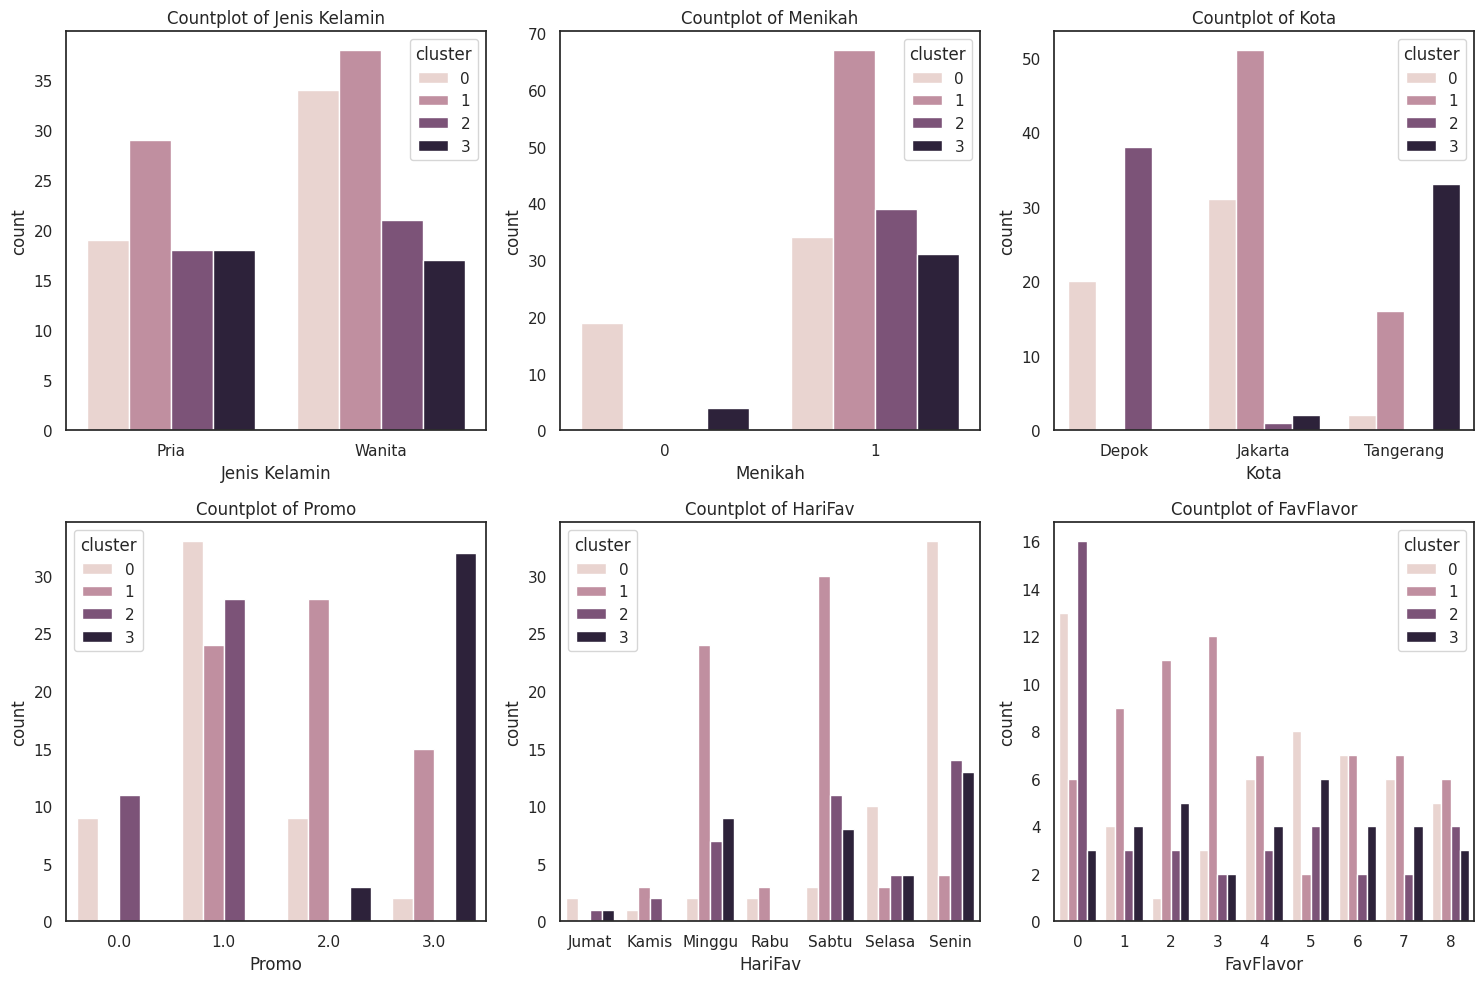

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
ax = ax.flatten()

# Plot each categorical column in a separate subplot
for i, column in enumerate(['Jenis Kelamin', 'Menikah', 'Kota', 'Promo', 'HariFav', 'FavFlavor']):
    # Assuming 'cluster' column contains the cluster assignments from k-means++
    sns.countplot(data=df_final_cluster, x=column, ax=ax[i], hue='cluster')
    ax[i].set_title(f'Countplot of {column}')

plt.tight_layout()
plt.show()

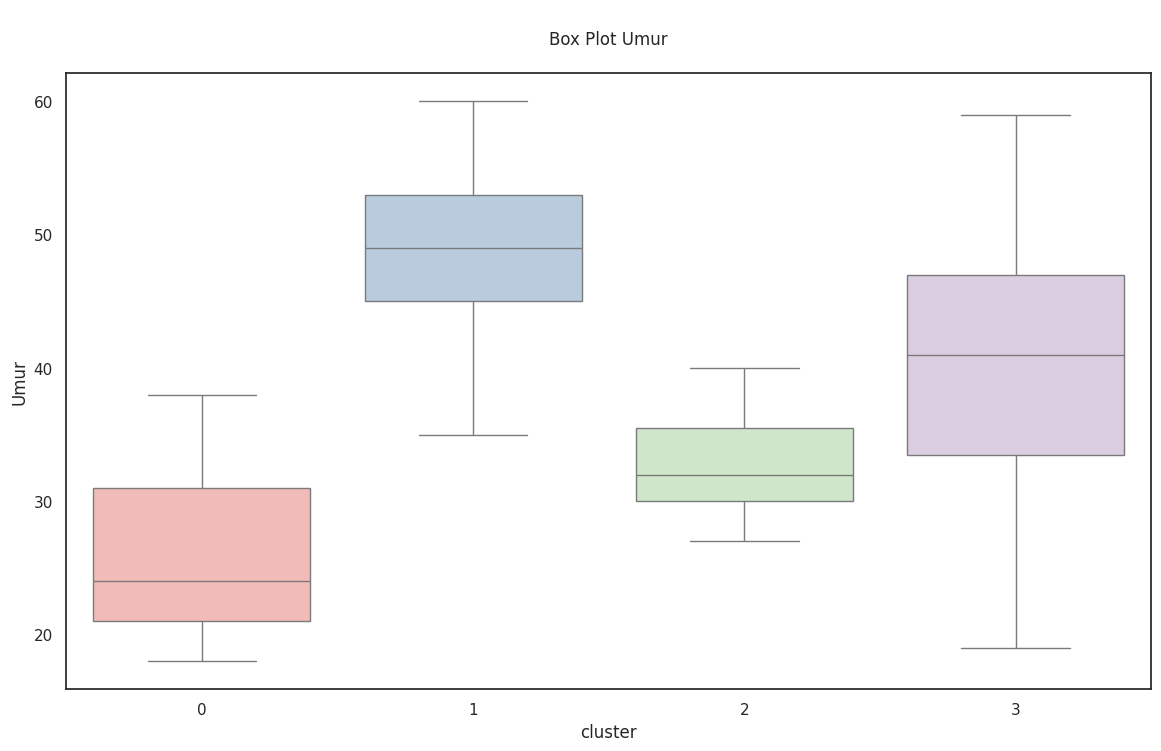

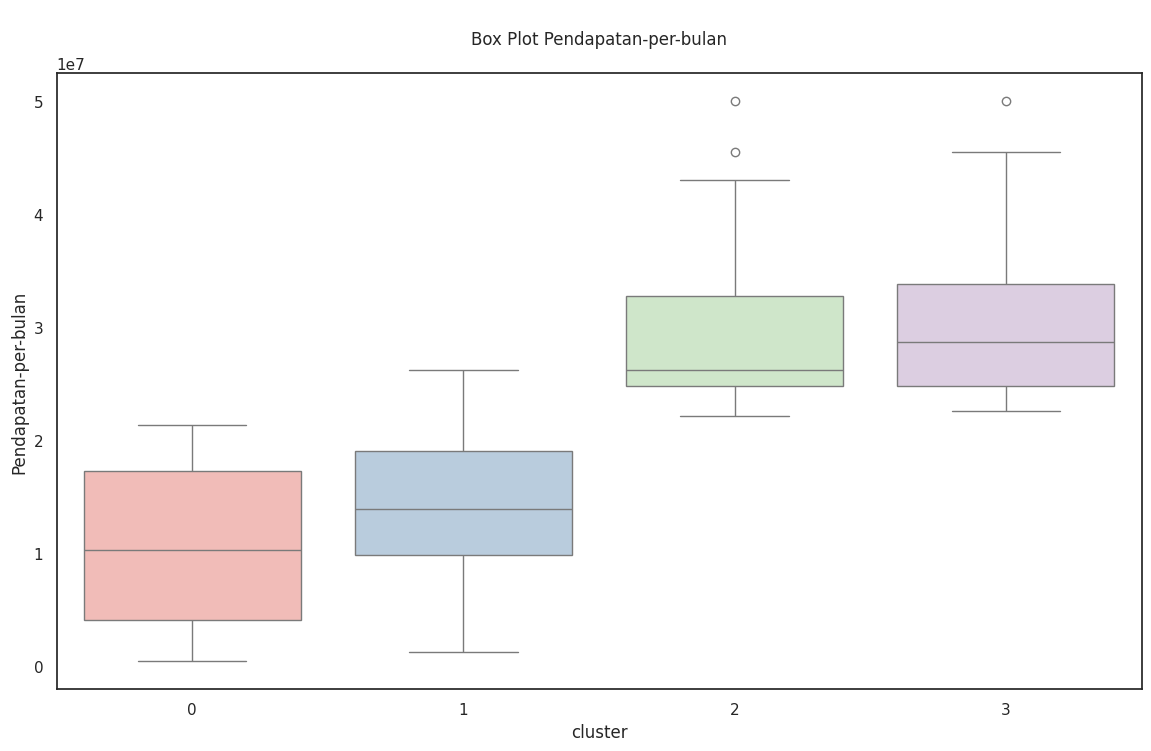

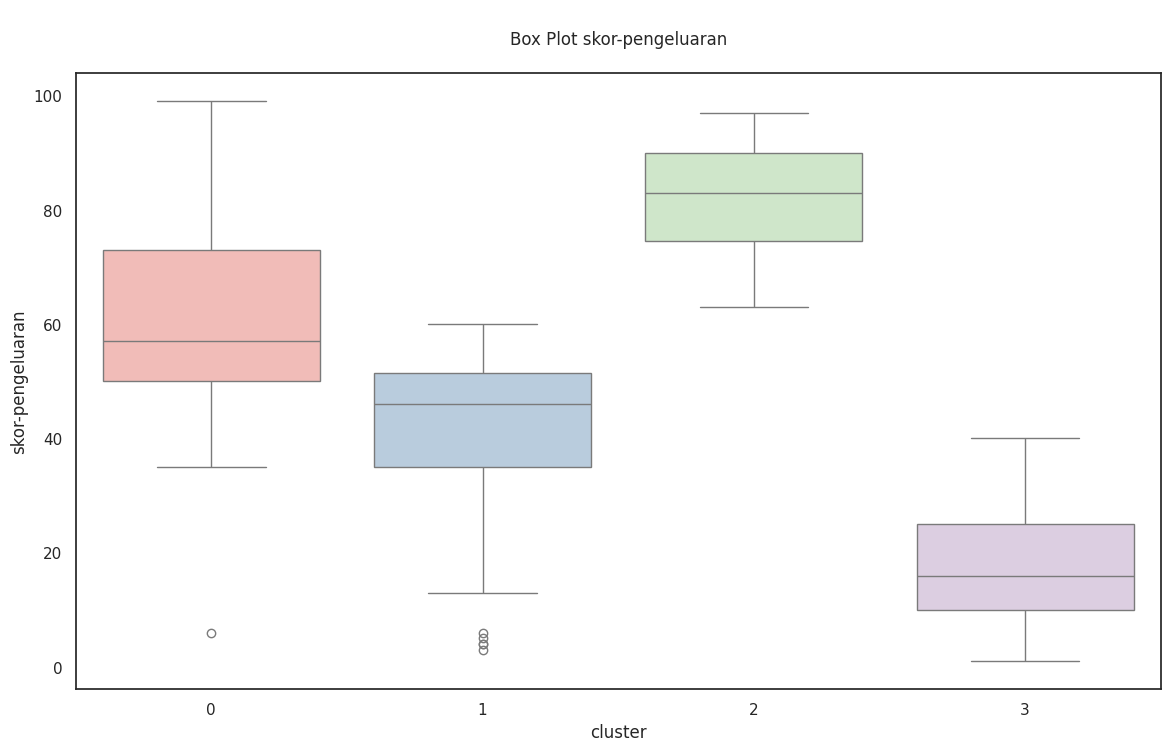

In [ ]:
for i in kolom_numerik:
    plt.figure(figsize=(14,8))
    ax = sns.boxplot(x = 'cluster',y = i, data = df_final_cluster, palette="Pastel1")
    plt.title('\nBox Plot {}\n'.format(i), fontsize=12)
    plt.show()

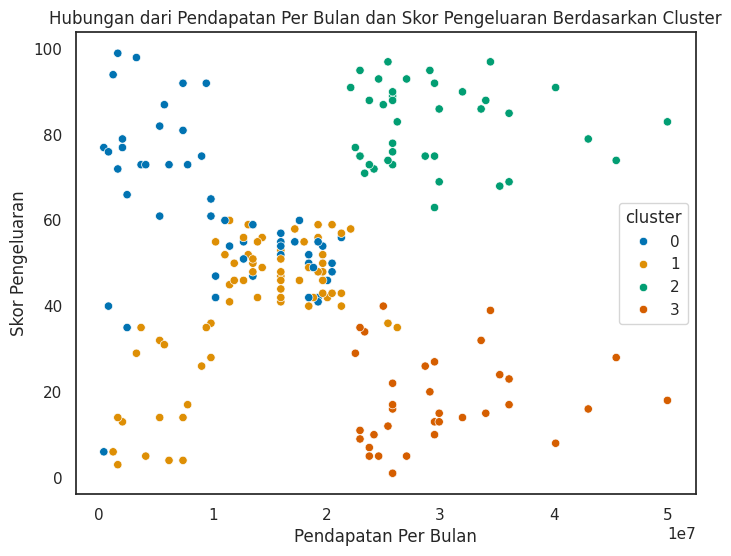

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Pendapatan-per-bulan', y='skor-pengeluaran', hue='cluster', data=df_final_cluster, palette = 'colorblind')

plt.title('Hubungan dari Pendapatan Per Bulan dan Skor Pengeluaran Berdasarkan Cluster')
plt.xlabel('Pendapatan Per Bulan')
plt.ylabel('Skor Pengeluaran')

plt.show()

### **Kesimpulan Analisis Cluster Pelanggan:**


1. **Cluster 0:**
   - **Karakteristik:** Pelanggan dalam cluster ini memiliki **pendapatan menengah** dengan **tingkat pengeluaran yang tinggi**. Di dominasi pelanggan dari **Jakarta** lalu disusul dengan **Depok** dan **jarang memanfaatkan promo**.
   - **Usia Rata-rata:** Sekitar **25 tahun**.
   - **Insight:** Cluster ini menunjukkan bahwa pelanggan muda di Jakarta cenderung memiliki tingkat pengeluaran yang tinggi meskipun berpendapatan menengah. Hal ini dapat mengindikasikan bahwa mereka lebih mengutamakan pengeluaran untuk gaya hidup atau kebutuhan tertentu. Peluang untuk menawarkan produk premium atau pengalaman eksklusif dapat menarik perhatian mereka.

2. **Cluster 1:**
   - **Karakteristik:** Pelanggan dalam cluster ini memiliki **pendapatan menengah** dengan **tingkat pengeluaran sedang**. Mereka juga tinggal di **Jakarta** dan **sering memanfaatkan promo** dengan status pernikahan **sudah menikah** cenderung menggunakan promo pada hari **sabtu** dan **minggu**.
   - **Usia Rata-rata:** Sekitar **48 tahun**.
   - **Insight:** Pelanggan yang lebih dewasa dalam cluster ini cenderung memanfaatkan promo untuk memaksimalkan pengeluaran mereka. Strategi pemasaran yang berfokus pada penawaran promo atau diskon akan sangat efektif untuk mempertahankan serta menarik lebih banyak pelanggan dalam kategori ini.

3. **Cluster 2:**
   - **Karakteristik:** Cluster ini terdiri dari pelanggan dengan **pendapatan tinggi** dan **tingkat pengeluaran yang tinggi**. Mereka tinggal di **Depok** dan **jarang menggunakan promo**.
   - **Usia Rata-rata:** Sekitar **32 tahun**.
   - **Insight:** Pelanggan dengan pendapatan tinggi di Depok tampak lebih percaya diri dalam mengeluarkan uang dan kurang tertarik pada promo. Ini membuka peluang besar untuk menawarkan produk premium atau layanan eksklusif tanpa perlu fokus pada diskon atau penawaran promosi.

4. **Cluster 3:**
   - **Karakteristik:** Pelanggan dalam cluster ini memiliki **pendapatan tinggi** namun dengan **tingkat pengeluaran rendah**. Mereka tinggal di **Tangerang** dan **sering memanfaatkan promo** dengan status penikahan **sudah menikah**.
   - **Usia Rata-rata:** Sekitar **40 tahun**.
   - **Insight:** Meskipun memiliki pendapatan tinggi, pelanggan ini lebih berhati-hati dalam mengelola pengeluaran dan cenderung memanfaatkan promo. Strategi pemasaran yang menawarkan program loyalitas atau penawaran dengan nilai tambah dapat meningkatkan keinginan mereka untuk berbelanja lebih banyak.

# **Rekomendasi ke MixITup**

1. Kami merekomendasikan tiga kota untuk pengembangan dengan prioritas, yaitu:
    - Depok
    - Jakarta
    - Tangerang

2. Ketentuan berdasarkan karakteristik tiap kota:
   
   - **Jakarta:** Di Jakarta, terdapat dua segmen pelanggan utama, yaitu Pelanggan muda, yang cenderung datang pada hari **Senin**, dan pelanggan yang lebih tua dan sudah menikah, yang biasanya berkunjung pada hari **Sabtu** dan **minggu**. Kami merekomendasikan agar dekorasi ruangan dibuat **instagramable** untuk menarik segmen pelanggan muda, namun juga nyaman dan ramah untuk **family time** guna menarik segmen keluarga yang lebih tua.Untuk menarik segmen keluarga ini, saya merekomendasikan promo yang bersifat **family bundle** yang diluncurkan pada hari **Sabtu** dan **Minggu**.
   
   - **Depok:** Di Depok, karena pelanggan memiliki **skor pengeluaran tinggi** dan jarang menggunakan promo, kami menyarankan untuk tidak terlalu berfokus pada penawaran promosi. Sebaiknya, **tingkatkan kualitas produk** dan fokus pada pengalaman premium yang mampu menarik minat pelanggan tanpa harus bergantung pada diskon.

   - **Tangerang:** Pelanggan di Tangerang menunjukkan **skor pengeluaran rendah** dan cenderung hanya melakukan pembelian saat ada promo. Untuk mengubah tren ini, kami merekomendasikan agar mengadakan **promo secara rutin** sebagai strategi utama untuk menarik pelanggan dan mendorong penjualan. Mengingat pelanggan di kawasan ini memiliki **tingkat pendapatan yang tinggi**. Dengan demikian, promo tidak hanya akan menarik perhatian, tetapi juga dapat menjadi cara yang efektif untuk mempertahankan loyalitas pelanggan.

# **Kelebihan dan Kekurangan Customer Segmentation Berdasarkan Rekomendasi**

1. **Jakarta**



   - **Kelebihan:**

     - **Dekorasi instagramable** dapat menarik segmen pelanggan muda yang mengutamakan estetika dan pengalaman berbelanja yang menarik.

     - **Family bundle promo** pada akhir pekan dapat meningkatkan penjualan dengan menarik segmen keluarga yang sering mengunjungi toko pada hari Sabtu dan Minggu.

     - Menciptakan ruang yang nyaman bagi keluarga akan meningkatkan frekuensi kunjungan dan membuat toko menjadi destinasi pilihan untuk waktu bersama keluarga.

   - **Kekurangan:**

     - Memadukan dua segmen (muda dan keluarga) dalam satu tempat bisa menjadi tantangan, karena preferensi dekorasi dan suasana mungkin berbeda.

     - Promosi family bundle yang terlalu sering bisa menurunkan persepsi premium dari produk, terutama jika terlalu banyak diskon atau penawaran.

2. **Depok**



   - **Kelebihan:**

     - Fokus pada **kualitas produk** dan **pengalaman premium** dapat menarik pelanggan dengan pengeluaran tinggi tanpa harus menawarkan diskon, yang berpotensi meningkatkan margin keuntungan.

     - Pelanggan dengan pendapatan tinggi cenderung mengutamakan **kualitas** dan **keistimewaan**, sehingga pendekatan ini sesuai dengan preferensi mereka.

   - **Kekurangan:**

     - Tanpa promosi atau diskon, toko mungkin terlihat kurang kompetitif dibandingkan toko lain yang menawarkan promo menarik, yang bisa membuat beberapa pelanggan potensial enggan berkunjung.

     - Meningkatkan kualitas produk atau layanan premium biasanya memerlukan biaya tambahan, yang mungkin akan mempersempit pasar jika harga produk menjadi terlalu tinggi.

3. **Tangerang**



   - **Kelebihan:**

     - Mengadakan **promo secara rutin** dapat langsung menarik perhatian pelanggan yang sensitif terhadap harga, sehingga berpotensi meningkatkan volume penjualan dalam jangka pendek.

     - Promo yang konsisten dapat mempertahankan loyalitas pelanggan dan menciptakan kebiasaan belanja yang lebih sering di antara pelanggan dengan pengeluaran rendah.

   - **Kekurangan:**

     - Ketergantungan yang terlalu besar pada promo dapat mengurangi **persepsi nilai** produk, di mana pelanggan hanya mau berbelanja saat ada promo, bukan karena kualitas produk.

     - Promo terus-menerus dapat mengurangi **laba** jika margin keuntungan pada produk yang didiskon terlalu tipis atau jika promo tidak diimbangi dengan penjualan yang lebih besar.